In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
X_train = pd.read_csv(r'../datasets/htrain.csv')
X_val = pd.read_csv(r'../datasets/hval.csv')
X_test = pd.read_csv(r'../datasets/htest.csv')
y_train = pd.read_csv(r'../datasets/hy_train.csv')
y_val = pd.read_csv(r'../datasets/hy_val.csv')
y_test = pd.read_csv(r'../datasets/hy_test.csv')

## Tensorflow Models

## SKLearn Models :

- sklearn model 1. Random Forest Regressor

d:\programming\projects\pavement-prediction\.pave\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest - MSE: 0.007820020930214434, R^2: -0.731741101511882


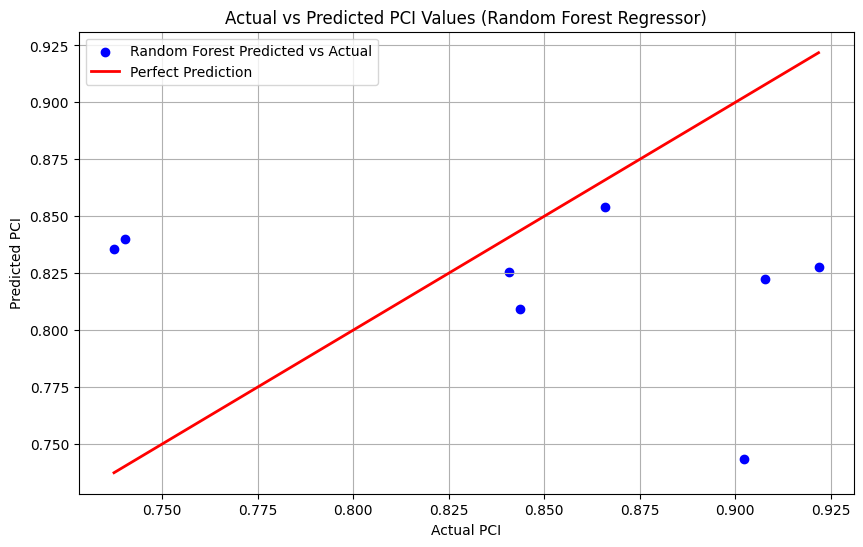

CPU times: total: 188 ms
Wall time: 459 ms


In [3]:
%%time
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest - MSE: {mse_rf}, R^2: {r2_rf}')


# Plot Actual vs Predicted values for the best model (use the one with the highest R^2 score)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Random Forest Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted PCI Values (Random Forest Regressor)')
plt.xlabel('Actual PCI')
plt.ylabel('Predicted PCI')
plt.legend()
plt.grid(True)
plt.show()

- sklearn model 2. Gradient Boosting Regressor

Gradient Boosting - MSE: 0.012667846277710108, R^2: -1.8052904541450308


d:\programming\projects\pavement-prediction\.pave\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


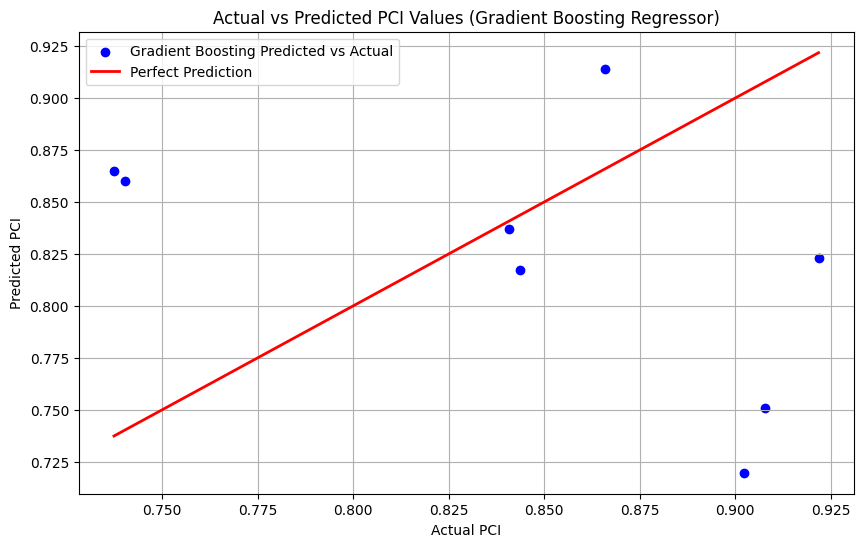

CPU times: total: 62.5 ms
Wall time: 315 ms


In [4]:
%%time
# Initialize the model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f'Gradient Boosting - MSE: {mse_gb}, R^2: {r2_gb}')


# Plot Actual vs Predicted values for the best model (use the one with the highest R^2 score)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='blue', label='Gradient Boosting Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted PCI Values (Gradient Boosting Regressor)')
plt.xlabel('Actual PCI')
plt.ylabel('Predicted PCI')
plt.legend()
plt.grid(True)
plt.show()

- sklearn model 3. XGBoost Regressor

XGBoost - MSE: 0.01835028831206855, R^2: -3.0636649131774902


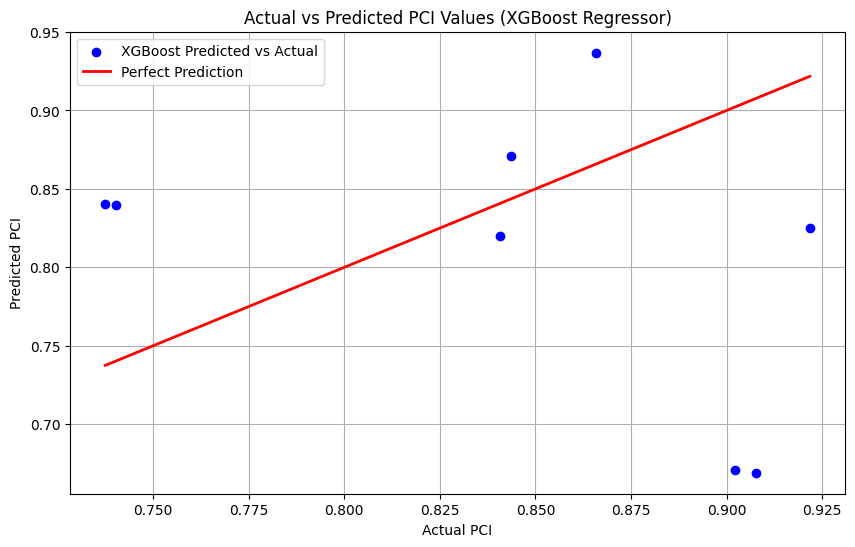

CPU times: total: 1.53 s
Wall time: 400 ms


In [5]:
%%time
# Initialize the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost - MSE: {mse_xgb}, R^2: {r2_xgb}')



# Plot Actual vs Predicted values for the best model (use the one with the highest R^2 score)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', label='XGBoost Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted PCI Values (XGBoost Regressor)')
plt.xlabel('Actual PCI')
plt.ylabel('Predicted PCI')
plt.legend()
plt.grid(True)
plt.show()

- sklearn model 4. XGBoost Regressor with hyperparameter training

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best XGBoost Model - MSE: 0.010185831396787921, R^2: -1.2556490898132324


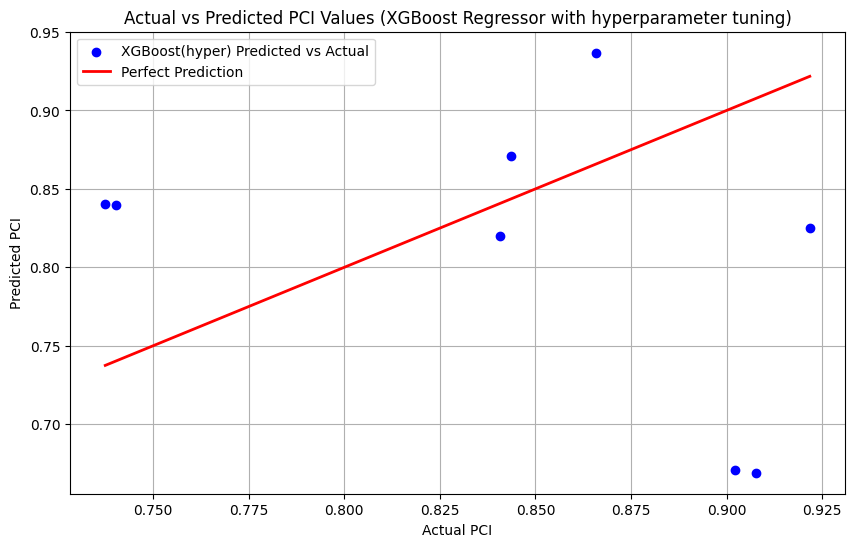

CPU times: total: 2min 54s
Wall time: 14.5 s


In [6]:
%%time
# Example: Tuning XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

best_xgb_model = grid_search.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate the best model
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)
print(f'Best XGBoost Model - MSE: {mse_best_xgb}, R^2: {r2_best_xgb}')


# Plot Actual vs Predicted values for the best model (use the one with the highest R^2 score)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', label='XGBoost(hyper) Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted PCI Values (XGBoost Regressor with hyperparameter tuning)')
plt.xlabel('Actual PCI')
plt.ylabel('Predicted PCI')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
print(f'Random Forest -     MSE: {mse_rf}, R^2: {r2_rf}')
print(f'Gradient Boosting - MSE: {mse_gb}, R^2: {r2_gb}')
print(f'XGBoost -           MSE: {mse_xgb}, R^2: {r2_xgb}')
print(f'Best XGBoost Model- MSE: {mse_best_xgb}, R^2: {r2_best_xgb}')

Random Forest -     MSE: 0.007820020930214434, R^2: -0.731741101511882
Gradient Boosting - MSE: 0.012667846277710108, R^2: -1.8052904541450308
XGBoost -           MSE: 0.01835028831206855, R^2: -3.0636649131774902
Best XGBoost Model- MSE: 0.010185831396787921, R^2: -1.2556490898132324


## More Advanced models :

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor

1. XGBoost Regressor with Hyperparameter Tuning

Fitting 5 folds for each of 50 candidates, totalling 250 fits


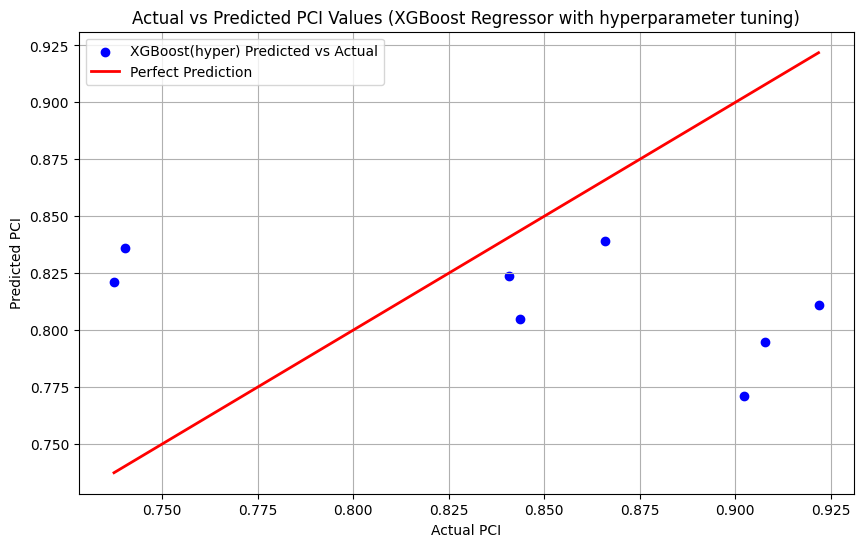

CPU times: total: 2.77 s
Wall time: 2.4 s


In [18]:
%%time 
xgb = XGBRegressor(random_state=42)
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb_random_search = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_grid,
                                       n_iter=50, cv=5, verbose=1, random_state=42, n_jobs=-1)
xgb_random_search.fit(X_train, y_train)

# Best model and predictions
best_xgb = xgb_random_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', label='XGBoost(hyper) Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted PCI Values (XGBoost Regressor with hyperparameter tuning)')
plt.xlabel('Actual PCI')
plt.ylabel('Predicted PCI')
plt.legend()
plt.grid(True)
plt.show()


2. LightGBM Regressor

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 35, number of used features: 0
[LightGBM] [Info] Start training from score 0.792977
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there

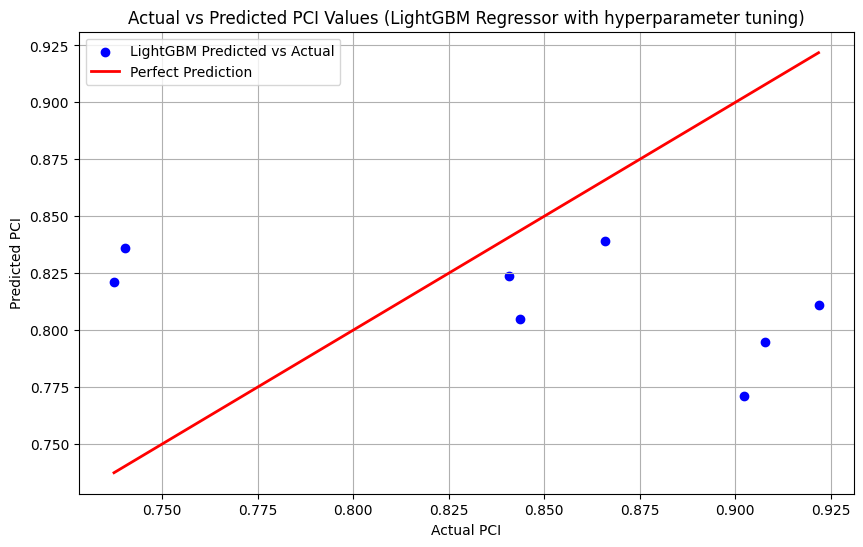

CPU times: total: 922 ms
Wall time: 3.02 s


In [19]:
%%time
lgbm = LGBMRegressor(random_state=42)
lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'num_leaves': [20, 31, 50],
    'subsample': [0.7, 0.8, 0.9]
}

lgbm_random_search = RandomizedSearchCV(estimator=lgbm, param_distributions=lgbm_param_grid,
                                        n_iter=50, cv=5, verbose=1, random_state=42, n_jobs=-1)
lgbm_random_search.fit(X_train, y_train)

# Best model and predictions
best_lgbm = lgbm_random_search.best_estimator_
y_pred_lgbm = best_lgbm.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', label='LightGBM Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted PCI Values (LightGBM Regressor with hyperparameter tuning)')
plt.xlabel('Actual PCI')
plt.ylabel('Predicted PCI')
plt.legend()
plt.grid(True)
plt.show()


3. CatBoost Regressor

d:\programming\projects\pavement-prediction\.pave\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 27 candidates, totalling 135 fits


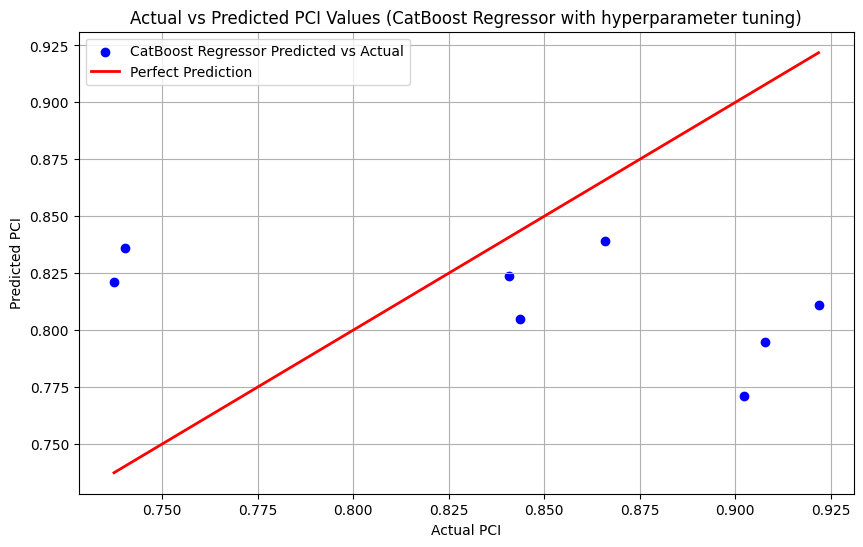

CPU times: total: 156 ms
Wall time: 2min 41s


In [21]:
%%time
catboost = CatBoostRegressor(random_seed=42, verbose=0)
catboost_param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 5, 7]
}

catboost_random_search = RandomizedSearchCV(estimator=catboost, param_distributions=catboost_param_grid,
                                            n_iter=50, cv=5, verbose=1, random_state=42, n_jobs=-1)
catboost_random_search.fit(X_train, y_train)

# Best model and predictions
best_catboost = catboost_random_search.best_estimator_
y_pred_catboost = best_catboost.predict(X_test)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', label='CatBoost Regressor Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted PCI Values (CatBoost Regressor with hyperparameter tuning)')
plt.xlabel('Actual PCI')
plt.ylabel('Predicted PCI')
plt.legend()
plt.grid(True)
plt.show()